<img src= "https://images.unsplash.com/photo-1586710025696-b142c39e7355?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8amZrJTIwYWlycG9ydHxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=800&q=60" alt ="jfk" style='width: 2000px;'>

# Purpose of this project:
To test several models to predict Taxi_out time for JFK Airport.

Taxi_out is the time aircrafts spend on the surface. The period of time when the aircraft leave the tereminal and actually takes off.

Reducing the taxi_out time will help in cutting the consumption of fuel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
jfk2=pd.read_csv("../input/flight-take-off-data-jfk-airport/M1_final.csv")
jfk1=jfk2.iloc[:,:].values
jfk=pd.DataFrame(jfk1)
err_lab=[]
err_ohe=[]

# 1. Label encoding

In [2]:
#label encoding the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lab_enc=LabelEncoder()
one_hot=OneHotEncoder()
jfk.iloc[:,3]= lab_enc.fit_transform(jfk.iloc[:,3])
jfk.iloc[:,4]= lab_enc.fit_transform(jfk.iloc[:,4])
jfk.iloc[:,5]= lab_enc.fit_transform(jfk.iloc[:,5])
jfk.iloc[:,15]= lab_enc.fit_transform(jfk.iloc[:,15])
jfk.iloc[:,19]= lab_enc.fit_transform(jfk.iloc[:,19])
jfk = jfk.astype('int')
jfk.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,11,1,5,3,1405,10,-1,124,636,324,...,34,58,15,25,38,29,4,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,...,34,58,15,25,38,29,4,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,...,34,58,15,25,38,29,4,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,...,34,58,15,25,38,29,4,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,...,32,58,15,24,35,29,4,9,17,13
5,11,1,5,1,2041,36,-1,161,740,359,...,32,58,15,24,35,29,4,9,17,21
6,11,1,5,1,21,28,-1,373,2475,360,...,32,58,15,24,35,29,4,9,17,26
7,11,1,5,3,331,7,-5,80,301,365,...,32,58,15,24,35,29,4,17,21,11
8,11,1,5,3,1111,29,0,368,2465,365,...,32,58,15,24,35,29,4,17,21,25
9,11,1,5,3,350,20,3,184,1069,370,...,32,58,15,24,35,29,4,17,21,29


In [3]:
#splitting the dataset in the ration of 90:10
from sklearn.model_selection import train_test_split
X=jfk[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y=jfk[[22]]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=20)

1.1 Linear Regression

In [4]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lr0 = LinearRegression()
lr0.fit(X_train, y_train)
x_lr0=lr0.predict(X_test)
temp= math.sqrt(mean_squared_error(y_test,x_lr0))
err_lab.append(temp)

1.2 Ridge Regression

In [5]:
from sklearn.linear_model import Ridge
lr1 = Ridge(alpha=0.5, normalize = True)
lr1.fit(X_train, y_train)
x_lr1=lr1.predict(X_test)
temp= math.sqrt(mean_squared_error(y_test,x_lr1))
err_lab.append(temp)

1.3 Lasso Regression

In [6]:
from sklearn.linear_model import Lasso
lr2 = Lasso(alpha=0.1)
lr2.fit(X_train, y_train)
x_lr2=lr2.predict(X_test)
temp= math.sqrt(mean_squared_error(y_test,x_lr2))
err_lab.append(temp)

1.4 KNeighbors Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
knn_pred= knn.fit(X_train,y_train.values.ravel()).predict(X_test)
temp= math.sqrt(mean_squared_error(y_test,knn_pred))
err_lab.append(temp)

1.5 Support Vector Regression

In [8]:
from sklearn.svm import SVR
reg= SVR(kernel='rbf')
reg.fit(X_train,y_train.values.ravel())
svr_pred= reg.predict(X_test)
temp= math.sqrt(mean_squared_error(y_test,svr_pred))
err_lab.append(temp)

1.6 Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb_pred= gnb.fit(X_train,y_train.values.ravel()).predict(X_test)
temp= math.sqrt(mean_squared_error(y_test,gnb_pred))
err_lab.append(temp)

1.7 Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc_pred= rfc.fit(X_train,y_train.values.ravel()).predict(X_test)
temp= math.sqrt(mean_squared_error(y_test,rfc_pred))
err_lab.append(temp)

1.8 Light GBM

In [11]:
import lightgbm as lgb
lgb_train= lgb.Dataset(X_train, label = y_train)
lgb_eval= lgb.Dataset(X_train,y_train, reference= lgb_train)
params = {'boosting_type': 'gbdt', 'num_leaves': 60, 'learning_rate': 0.2}
gbm_pred = lgb.train(params, lgb_train, 100).predict(X_test)
temp= math.sqrt(mean_squared_error(y_test,gbm_pred))
err_lab.append(temp)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2072
[LightGBM] [Info] Number of data points in the train set: 25938, number of used features: 22
[LightGBM] [Info] Start training from score 20.867492


# 2. One Hot Encoding

In [12]:
#hot encoding whole datasets
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
X_ohe = pd.get_dummies(X, columns=[3, 5, 13, 15, 19])

X1_train, X1_test, y1_train, y1_test = train_test_split(X_ohe,y, test_size = 0.1, random_state =10)

2.1 Linear Regression

In [13]:
lr0.fit(X1_train, y1_train)
x1_lr0=lr0.predict(X1_test)
temp= math.sqrt(mean_squared_error(y1_test,x1_lr0))
err_ohe.append(temp)

2.2 Ridge Regression

In [14]:
lr1.fit(X1_train, y1_train)
x1_lr1=lr1.predict(X1_test)
temp= math.sqrt(mean_squared_error(y1_test,x1_lr1))
err_ohe.append(temp)

2.3 Lasso Regression

In [15]:
lr2 = Lasso(alpha=0.1)
lr2.fit(X1_train, y1_train)
x1_lr2=lr2.predict(X1_test)
temp= math.sqrt(mean_squared_error(y1_test,x1_lr2))
err_ohe.append(temp)

2.4 KNeighbors Classifier

In [16]:
knn= KNeighborsClassifier(n_neighbors=10)
knn_pred1= knn.fit(X1_train,y1_train.values.ravel()).predict(X1_test)
temp= math.sqrt(mean_squared_error(y1_test,knn_pred1))
err_ohe.append(temp)

2.5 Support Vector Regression

In [17]:
reg= SVR()
reg.fit(X1_train,y1_train.values.ravel())
svr_pred1= reg.predict(X1_test)
temp= math.sqrt(mean_squared_error(y1_test,svr_pred1))
err_ohe.append(temp)

2.6 Gaussian Naive Bayes

In [18]:
gnb= GaussianNB()
gnb_pred= gnb.fit(X1_train,y1_train.values.ravel()).predict(X1_test)
temp= math.sqrt(mean_squared_error(y1_test,gnb_pred))
err_ohe.append(temp)

2.7 Random Forest Classifier

In [19]:
rfc= RandomForestClassifier()
rfc_pred1= rfc.fit(X1_train,y1_train.values.ravel()).predict(X1_test)
temp= math.sqrt(mean_squared_error(y1_test,rfc_pred1))
err_ohe.append(temp)

2.8 Light GBM

In [20]:
lgb_train= lgb.Dataset(X1_train, label = y1_train)
lgb_eval= lgb.Dataset(X1_train,y1_train, reference= lgb_train)
params = {'boosting_type': 'gbdt', 'num_leaves': 60, 'learning_rate': 0.2}
gbm_pred1 = lgb.train(params, lgb_train, 100).predict(X1_test)
temp= math.sqrt(mean_squared_error(y1_test,gbm_pred1))
err_ohe.append(temp)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2233
[LightGBM] [Info] Number of data points in the train set: 25938, number of used features: 188
[LightGBM] [Info] Start training from score 20.825468


# Compairing models on the basis of RMSE

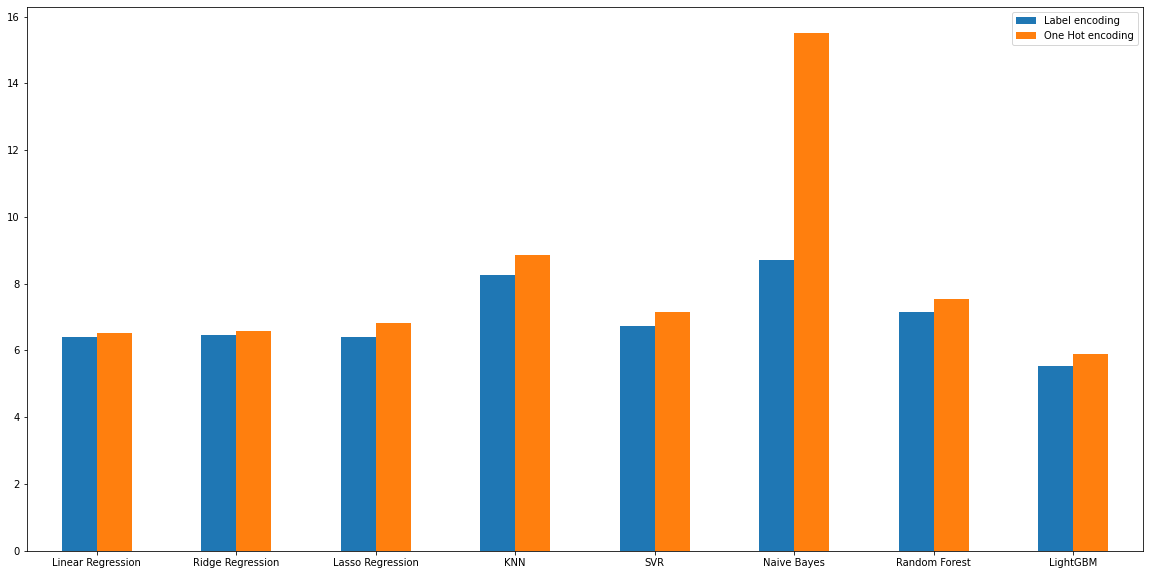

In [21]:
labels=['Linear Regression','Ridge Regression','Lasso Regression','KNN','SVR','Naive Bayes','Random Forest','LightGBM']
df = pd.DataFrame({'Label encoding':err_lab,'One Hot encoding':err_ohe}, index=labels)
ax = df.plot.bar(rot=0,figsize=(20,10))

# Conclusions:
1. Label encoding is better in predicting taxi_out time in almost all algorithms.
2. One hot encoding produces exceptinally big RMSE in Naive Bayes algorithm.
3. On the basis of RMSE we can say that LightGBM model is best model in both Label encoded as well as One Hot Encoded data.